# Clasificación de prendas de vestir

* Francisco Josse Roja Rojas (frrojasr@unal.edu.co)
* Yeira Liseth Rodríguez Rodríguez (yrodriguezro@unal.edu.co)

A continuación se presenta el segundo ejercicio del capítulo 5 de la materia de Inteligencia Artificial y mini-robots

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

#### 1. Cargar y preparar el dataset
El conjunto Fashion MNIST contiene imágenes de 28x28 píxeles en escala de grises. Aquí las cargamos, normalizamos los valores de los pixeles y adaptamos las dimensiones para que sean compatibles con capas convolucionales (es decir, se añade un canal extra).

In [17]:
# Cargar el dataset original
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Añadir canal para trabajar como imágenes (28,28,1)
train_imgs = train_imgs[..., np.newaxis]
test_imgs = test_imgs[..., np.newaxis]

# Redimensionar imágenes a 64x64
train_imgs_resized = tf.image.resize(train_imgs, [64, 64]).numpy() / 255.0
test_imgs_resized = tf.image.resize(test_imgs, [64, 64]).numpy() / 255.0

# Codificación one-hot para las etiquetas
train_labels_oh = to_categorical(train_labels, num_classes=10)
test_labels_oh = to_categorical(test_labels, num_classes=10)

#### 2. Definir la arquitectura de la red convolucional
Construimos una red convolucional simple, con dos capas `Conv2D`, seguidas por `MaxPooling2D`, una capa densa oculta con `Dropout` y una capa de salida con `softmax`.

In [18]:
cnn64_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

#### 3. Compilación del modelo
Usamos el optimizador Adam y la función de pérdida categorical_crossentropy, adecuada para problemas de clasificación multiclase con etiquetas codificadas en one-hot.

In [19]:
cnn64_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### 4. Entrenamiento de la red neuronal
Entrenamos por 12 épocas usando una fracción del dataset como validación. Esto nos permite detectar overfitting sin usar el conjunto de prueba.

In [20]:
history_64 = cnn64_model.fit(
    train_imgs_resized,
    train_labels_oh,
    epochs=12,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 207s 487ms/step - accuracy: 0.7128 - loss: 0.8036 - val_accuracy: 0.8748 - val_loss: 0.3313
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 196s 465ms/step - accuracy: 0.8696 - loss: 0.3670 - val_accuracy: 0.8965 - val_loss: 0.2802
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 206s 474ms/step - accuracy: 0.8914 - loss: 0.2970 - val_accuracy: 0.9058 - val_loss: 0.2573
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 198s 464ms/step - accuracy: 0.9031 - loss: 0.2678 - val_accuracy: 0.9073 - val_loss: 0.2501
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 206s 474ms/step - accuracy: 0.9144 - loss: 0.2348 - val_accuracy: 0.9178 - val_loss: 0.2254
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 198s 466ms/step - accuracy: 0.9223 - loss: 0.2136 - val_accuracy: 0.9193 - val_loss: 0.2274
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 205s 473ms/step - accuracy: 0.9283 - loss: 0.1937 - val_accuracy: 0.9192 - val_loss: 0.2254
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 201s 470ms/step - accuracy: 0.9352 -

#### 5. Evaluar desempeño en el conjunto de prueba
Ahora evaluamos el modelo entrenado con los datos de prueba y mostramos la precisión final.

In [21]:
test_loss, test_acc = cnn64_model.evaluate(test_imgs_resized, test_labels_oh, verbose=0)
print(f"Precisión final en test (64x64): {test_acc * 100:.2f}%")

Precisión final en test (64x64): 91.75%


#### 5. Diccionario de clases
El dataset contiene 10 clases diferentes de prendas. Usaremos esta lista para interpretar las predicciones.

In [27]:
class_labels = [
    "Camiseta", "Pantalón", "Suéter", "Vestido", "Abrigo",
    "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"
]

#### 6. Prueba del modelo con imágenes nuevas cargadas desde archivo
Ahora probamos el modelo con imágenes externas que subamos al entorno de ejecución. Estas imágenes deben estar en escala de grises y tamaño 28x28 píxeles.

In [34]:
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

Saving depositphotos_708100924-stock-illustration-ladies-handbag-icon-black-white.jpg to depositphotos_708100924-stock-illustration-ladies-handbag-icon-black-white.jpg


Archivo: depositphotos_708100924-stock-illustration-ladies-handbag-icon-black-white.jpg, tamaño: (600, 499), modo: RGB


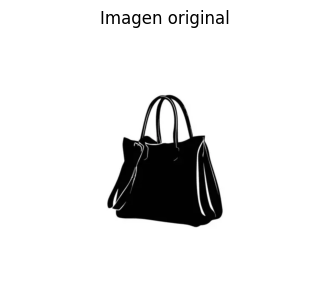

In [37]:
from PIL import Image
import matplotlib.pyplot as plt

# Mostrar cada imagen subida sin procesar
for file_name in uploaded.keys():
    try:
        img_original = Image.open(file_name)
        print(f"Archivo: {file_name}, tamaño: {img_original.size}, modo: {img_original.mode}")

        plt.figure(figsize=(4, 4))
        plt.imshow(img_original)
        plt.title(f"Imagen original")
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"⚠️ No se pudo abrir la imagen {file_name}: {e}")

#### 7. Predecir sobre imágenes externas
Leemos las imágenes cargadas, las preprocesamos para que tengan el mismo formato del dataset original y usamos el modelo para predecir su clase. Finalmente, se muestran junto a su etiqueta predicha.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


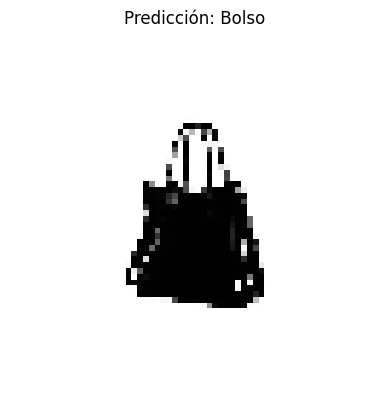

In [35]:
for fname in uploaded.keys():
    img = image.load_img(fname, color_mode="grayscale", target_size=(64, 64))
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)  # forma (1, 64, 64, 1)

    pred_probs = cnn64_model.predict(img_arr)
    pred_class = np.argmax(pred_probs)

    plt.imshow(img_arr[0].reshape(64, 64), cmap="gray")
    plt.title(f"Predicción: {class_labels[pred_class]}")
    plt.axis("off")
    plt.show()
